In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import cycle
from matplotlib.patches import Rectangle

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [30]:
dpi = 100

In [4]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

In [5]:
! rsync --progress "bluemoon-user1.uvm.edu:thesis/data/shanahan.csv" "../../data/shanahan.csv"

shanahan.csv
     9586040 100%  222.97MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 18620 bytes  received 12485 bytes  20736.67 bytes/sec
total size is 9586040  speedup is 308.18


In [6]:
with open("../../data/shanahan.csv", "r") as f:
    params = pd.read_csv(f, index_col=False)

params.head()

,run,alpha,beta,max_phase,chimera,metastability,r_bar
0,0,0.0,0.0000,6.283185,0.016237,0.016518,0.467744
1,0,0.0,0.0101,6.283185,0.033719,0.034811,0.641607
2,0,0.0,0.0202,6.283185,0.028046,0.029790,0.645064
3,0,0.0,0.0303,6.283185,0.033588,0.035064,0.650960
4,0,0.0,0.0404,6.283185,0.048452,0.051381,0.461566


In [7]:
params.shape

(100000, 7)

In [8]:
%%time
good = params.copy()
bads = set()
for _, [alpha, beta] in good.loc[params["max_phase"] >= 2*np.pi,
                                 ["alpha", "beta"]].drop_duplicates().iterrows():
    bads.add((alpha, beta))

for bad in bads:
    good.loc[(good["beta"] == bad[1]) & (good["alpha"] == bad[0]),
             ["chimera", "r_bar", "metastability"]] = np.nan

CPU times: user 36.6 s, sys: 520 ms, total: 37.1 s
Wall time: 45.7 s


In [9]:
good.sort_values("metastability", ascending=False).head(10)

,run,alpha,beta,max_phase,chimera,metastability,r_bar
10300,1,0.03030,0.0000,6.283185,0.096936,0.090620,0.252823
70401,7,0.04040,0.0101,6.283185,0.094323,0.087962,0.390118
70501,7,0.05051,0.0101,6.283185,0.091142,0.085626,0.374556
10301,1,0.03030,0.0101,6.283185,0.090566,0.085060,0.301764
601,0,0.06061,0.0101,6.283185,0.090063,0.084216,0.316200
30301,3,0.03030,0.0101,6.283185,0.089103,0.084155,0.387761
50601,5,0.06061,0.0101,6.283185,0.089219,0.084027,0.317254
40401,4,0.04040,0.0101,6.283185,0.089773,0.083985,0.409603
20602,2,0.06061,0.0202,6.283185,0.089621,0.083612,0.348405
10501,1,0.05051,0.0101,6.283185,0.089342,0.083373,0.276748


In [10]:
good.shape

(100000, 7)

In [11]:
good[good["max_phase"] <= 2*np.pi].shape

(52931, 7)

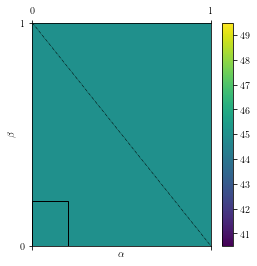

In [12]:
p = params.pivot_table(
    values="run",index="beta", columns="alpha",
    aggfunc=sum)

plt.matshow(p.values[:, :], origin="lower", aspect="auto",
            extent=[p.columns.min(), p.columns.max(),
                    p.index.min(), p.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
plt.savefig("../figure/runs", dpi=700)

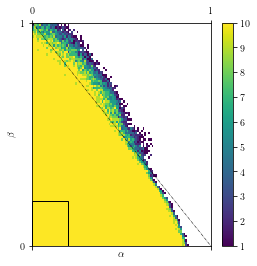

In [13]:
p = good[good["max_phase"] <= 2*np.pi].pivot_table(
    values="max_phase",index="beta", columns="alpha",
    aggfunc=len)
# p[p > 2*np.pi] = np.nan
# p[p <= 2*np.pi] = 1

plt.matshow(p.values[:, :], origin="lower", aspect="auto",
            extent=[p.columns.min(), p.columns.max(),
                    p.index.min(), p.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
plt.savefig("../figure/physical_runs", dpi=200)

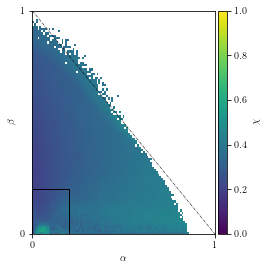

In [33]:
c = good.pivot_table(values="chimera", index="beta", columns="alpha"
                    )

im = plt.matshow(c.values[:, :]*7, origin="lower", aspect="auto", vmin=0, vmax=1,
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.gca().xaxis.set_ticks_position("bottom")
cbar = colorbar(im)
cbar.set_label(r"$\chi$")
plt.gcf().set_size_inches(3.5, 4)
plt.savefig(f"../../final/figure/aphysical_chimera_{dpi}dpi.pdf", dpi=dpi, bbox_inches="tight")

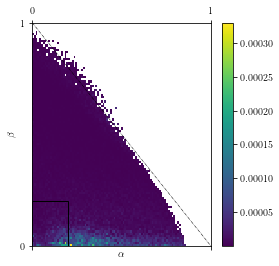

In [15]:
chi_var = good.pivot_table(values="chimera", index="beta", columns="alpha",
                           aggfunc=np.var
                          )

plt.matshow(chi_var.values[:, :], origin="lower", aspect="auto",
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
plt.savefig("../figure/chimera_var", dpi=200)

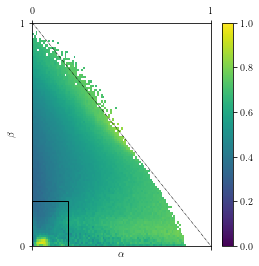

In [16]:
m = good.pivot_table(values="metastability", index="beta", columns="alpha",
                     aggfunc=np.mean
                    )

plt.matshow(m.values[:, :]*12, origin="lower", aspect="auto", vmin=0, vmax=1,
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
plt.savefig("../figure/meta", dpi=200)

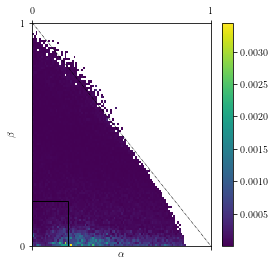

In [17]:
meta_var = good.pivot_table(values="metastability", index="beta", columns="alpha",
                            aggfunc=np.var
                           )

plt.matshow(meta_var.values[:, :]*12, origin="lower", aspect="auto",
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
plt.savefig("../figure/meta_var", dpi=200)

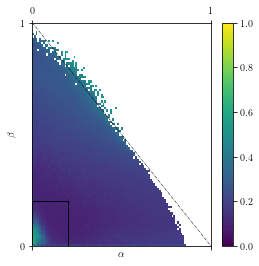

In [18]:
r = good.pivot_table(values="r_bar", index="beta", columns="alpha",
                     aggfunc=np.mean
                    )

plt.matshow(r.values[:, :], origin="lower", aspect="auto", vmin=0, vmax=1,
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
plt.savefig("../figure/r", dpi=200)

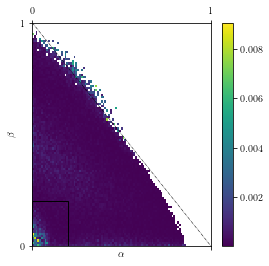

In [19]:
r_var = good.pivot_table(values="r_bar", index="beta", columns="alpha",
                         aggfunc=np.var
                        )

plt.matshow(r_var.values[:, :], origin="lower", aspect="auto",
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.plot([0, 1], [1, 0], "-.", color="k", lw=0.5)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.2, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
plt.savefig("../figure/r_var", dpi=200)

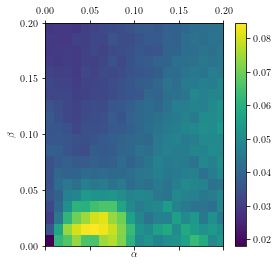

In [20]:
plt.matshow(c.values[:, :], origin="lower", aspect="auto",
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 0.2])
plt.ylim([0, 0.2])
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
plt.savefig("../figure/zoom_chimera", dpi=200)

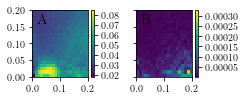

In [37]:
fig, [c_ax, var_ax] = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(3.5, 1.5))

c_im = c_ax.matshow(c.values[:, :], origin="lower", aspect="auto",
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])

c_ax.text(0.1, 0.8, "A", transform=c_ax.transAxes, size="x-large")

var_im = var_ax.matshow(chi_var.values[:, :], origin="lower", aspect="auto",
                        extent=[c.columns.min(), c.columns.max(),
                                c.index.min(), c.index.max()])

var_ax.text(0.1, 0.8, "B", transform=var_ax.transAxes, size="x-large")

for axis in [c_ax, var_ax]:
    axis.xaxis.set_ticks_position("bottom")
    axis.set_xlim([0, 0.2])
    axis.set_xticks([0, 0.1, 0.2])
    axis.set_ylim([0, 0.2])
    
colorbar(c_im)
colorbar(var_im)
fig.tight_layout()
plt.savefig(f"../../final/figure/zoom_{dpi}dpi.pdf", dpi=dpi)

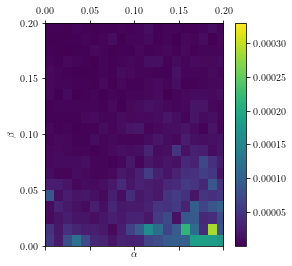

In [22]:
plt.matshow(chi_var.values[:, :], origin="lower", aspect="auto",
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.xlim([0, 0.2])
plt.ylim([0, 0.2])
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
plt.savefig("../figure/zoom_chimera_var", dpi=200)

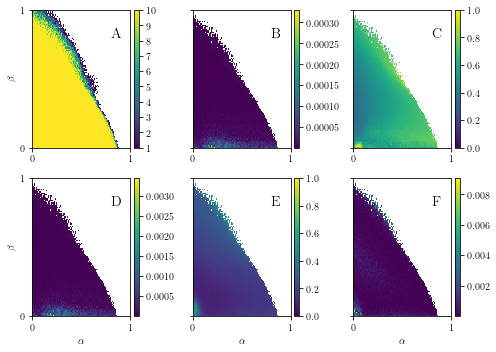

In [32]:
fig, [
    [p_ax, c_var_ax, m_ax],
    [m_var_ax, r_ax, r_var_ax]
] = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(7, 5))

axes = [
    p_ax, c_var_ax, m_ax,
    m_var_ax, r_ax, r_var_ax
]

p_im = p_ax.matshow(p.values[:, :], origin="lower", aspect="auto",
                    extent=[p.columns.min(), p.columns.max(),
                    p.index.min(), p.index.max()])

c_var_im = c_var_ax.matshow(chi_var.values[:, :], origin="lower", aspect="auto",
                            extent=[c.columns.min(), c.columns.max(),
                                    c.index.min(), c.index.max()])

m_im = m_ax.matshow(m.values[:, :]*12, origin="lower", aspect="auto", vmin=0, vmax=1,
                    extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])

m_var_im = m_var_ax.matshow(meta_var.values[:, :]*12, origin="lower", aspect="auto",
                            extent=[c.columns.min(), c.columns.max(),
                                    c.index.min(), c.index.max()])

r_im = r_ax.matshow(r.values[:, :], origin="lower", aspect="auto", vmin=0, vmax=1,
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])

r_var_im = r_var_ax.matshow(r_var.values[:, :], origin="lower", aspect="auto",
            extent=[c.columns.min(), c.columns.max(),
                    c.index.min(), c.index.max()])

ims = [
    p_im, c_var_im, m_im,
    m_var_im, r_im, r_var_im
]

alphabet = ["A", "B", "C", "D", "E", "F"] # Gross

for i, axis in enumerate(axes):
    axis.xaxis.set_ticks_position("bottom")
    axis.set_xticks([0, 1])
    axis.set_xticklabels([])
    axis.set_yticks([0, 1])
    axis.text(0.8, 0.8, alphabet[i], transform=axis.transAxes, size="x-large")

for im in ims:
    colorbar(im)

for axis in [m_var_ax, r_ax, r_var_ax]:
    axis.set_xlabel(r"$\alpha$")
    axis.set_xticklabels(["$0$", "$1$"])
    
for axis in [p_ax, m_var_ax]:
    axis.set_ylabel(r"$\beta$")
    axis.set_yticklabels(["$0$", "$1$"])

fig.tight_layout()

plt.savefig(f"../../final/figure/extras_{dpi}dpi.pdf", dpi=dpi, bbox_inches="tight")